In [ ]:
!pip install preliz

In [2]:
import preliz as pz

In [3]:
import numpy as np
import arviz as az
import pymc as pm

# Context

My project is creating a pymc betabinomial model predicting if Connor McDavid will score at least one goal per game in the regular 24-25 season. I have gotten my data from this [website.](https://www.nhl.com/oilers/player/connor-mcdavid-8478402) My goal is to see if the prior and likelihood I give the model create an accurate summarization of the data for the 24-25 season.

There are 82 games in a regular season, but Connor McDavid only played in 67 of those (due to injury). How many of those games will he score in? (This question is mainly useful for sports betters.)



# Prior

To establish my prior, I thought back to when I had no knowledge of McDavid's actual data, but rather just knew about his skill from hearing about him. My belief is that a good hockey player will score in approximately 35% of the games he plays, due to the constant nature of rotating players on the rink, possible injury, and inaccuracy when trying to get a shot on goal. I am not super confident in this prior as it is just my belief and not based upon actual knowledge I have.

In [4]:
McDavid_prior = pz.Beta(alpha=35,beta=65)
McDavid_prior.mean(), McDavid_prior.median(), McDavid_prior.mode()

(np.float64(0.35), 0.3489962553776181, np.float64(0.3469387755102041))

Therefore, our prior is established from $ p(θ)= Beta(α=35, β=65)$. The distribution below shows what this would look like.

<Axes: >

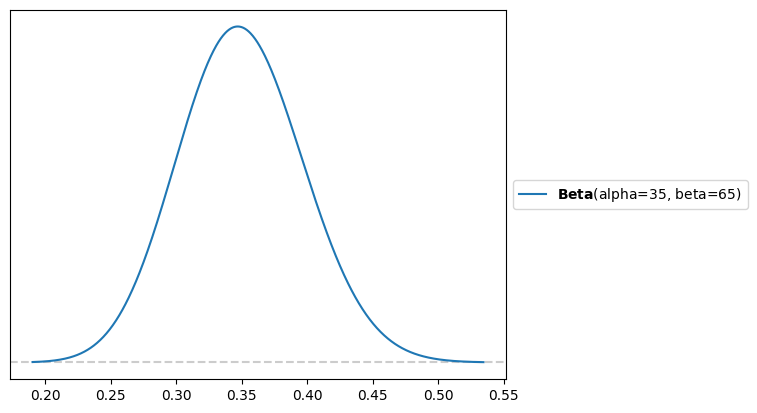

In [8]:
pz.Beta(alpha=35,beta=65).plot_pdf()

# Likelihood

To establish my likelihood, I looked at his goal points per game average for his past seasons with the Oilers (2015-2024). He has had some good seasons and some bad seasons, so getting an overall picture will be useful to establish a prior.

Out of 645 career games played prior to the 2024-2025 season he scored at least one goal in 267 of those games.

$p(y|θ) = Binomial(n=645,k=267,θ)$




# PyMC Model

In [5]:
McDavid_Goal = np.repeat(1,267)
McDavid_NoGoal= np.repeat(0,378)
McDavid_Data =np.concatenate([McDavid_Goal,McDavid_NoGoal])

In [ ]:
with pm.Model() as McDavid_model:
  θ = pm.Beta('θ', alpha = 35., beta = 65.)
  y = pm.Bernoulli('y', p = θ, observed = McDavid_Data)
  idata_McDavid = pm.sample()

<Axes: title={'center': 'θ'}>

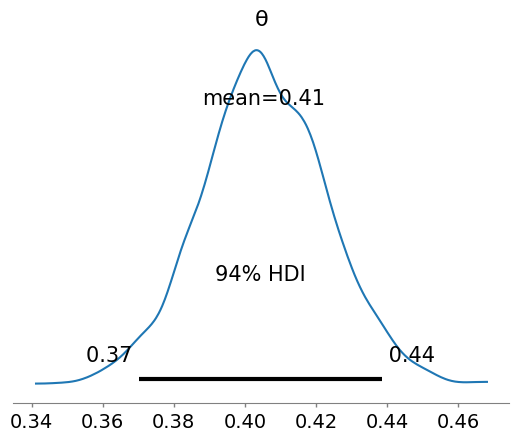

In [7]:
az.plot_posterior(idata_McDavid)

# Reflection

As shown by the Posterior the mean is 0.41, considerably higher than the belief of the Prior mean being 0.35. This shows that Connor McDavid is considerably better than what I believed originally (how often a hockey player will score at least once in every game). The HDI highlights this, saying that there is a 94% chance that the true mean is between 0.37 and 0.44, which 0.35 is not even a part of. This further demonstrates how great of a hockey player Connor McDavid is.

# Prediction for 24-25 Season

In [ ]:
pm.sample_posterior_predictive(idata_McDavid, model=McDavid_model, extend_inferencedata=True)

I know that Connor McDavid only played in 67 games in the 24-25 season. Therefore I use the model to extract the number of games he shall score in.

In [14]:
stacked_McDavid = az.extract(idata_McDavid, group="posterior_predictive")

In [16]:
stacked_McDavid.sel(sample=0).sel(draw=0).y.to_series().values[0:67]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0])

The array reflects that Connor McDavid will score in 32 out of the 67 games we know he played. However, in reality, McDavid only scored in 22 games. I believe this is because outside factors affected his season, such as a severe ankle injury early in the season and old age.